# **Ideias** 🤔

* Predição de desempenho futuro e análise de outliers (*O que fez alguns alunos serem um dos melhores que já passou na Passos?*)
* Predição para recomendação de bolsas, intercambio, etc
* Análise comparatória de 2020, 2021 e 2022
* Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)
* Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
* Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


# 1. Pré-Processamento

In [1]:
import pandas as pd

## 1.1 Leitura do dataset bruto

In [2]:
df = pd.read_csv("data/PEDE_PASSOS_DATASET_FIAP.csv", sep=";")
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [3]:
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [4]:
cols_2022 = df.columns[df.columns.str.contains('NOME') | df.columns.str.contains("2022")]
cols_2021 = df.columns[df.columns.str.contains('NOME') | df.columns.str.contains("2021")]
cols_2020 = df.columns[df.columns.str.contains('NOME') | df.columns.str.contains("2020")]

df_2022 = df[cols_2022].dropna(subset=['INDE_2022'])
df_2021 = df[cols_2021].dropna(subset=['INDE_2021'])
df_2020 = df[cols_2020].dropna(subset=['INDE_2020'])

print(df_2022.info())
print(df_2021.info())
print(df_2020.info())


<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG_2022              862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    float64

In [5]:
df_2021[df_2021['FASE_2021'].isna()]

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021


In [6]:
df_2020.columns = df_2020.columns.str.replace("_2020", "").str.lower()
df_2021.columns = df_2021.columns.str.replace("_2021", "").str.lower()
df_2022.columns = df_2022.columns.str.replace("_2022", "").str.lower()

print(df_2020.info())
print(df_2021.info())
print(df_2022.info())


<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 1347
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   instituicao_ensino_aluno  728 non-null    object
 1   nome                      728 non-null    object
 2   idade_aluno               728 non-null    object
 3   anos_pm                   728 non-null    object
 4   fase_turma                728 non-null    object
 5   ponto_virada              702 non-null    object
 6   inde                      728 non-null    object
 7   inde_conceito             728 non-null    object
 8   pedra                     728 non-null    object
 9   destaque_ieg              728 non-null    object
 10  destaque_ida              728 non-null    object
 11  destaque_ipv              703 non-null    object
 12  iaa                       728 non-null    object
 13  ieg                       728 non-null    object
 14  ips                       728 

In [7]:
df_2022[df_2022['nome'] == 'ALUNO-727']

,nome,fase,turma,ano_ingresso,bolsista,inde,cg,cf,ct,pedra,...,ipp,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,indicado_bolsa,ponto_virada,ipv,ian,nivel_ideal
726,ALUNO-727,0.0,N,2022.0,Não,5.702446,760.0,183.0,8.0,Quartzo,...,5.625,Mantido na Fase atual,Mantido na Fase atual,NaN,NaN,Não,Não,7.083325,5.0,Fase 2 (5º e 6º ano)


### Dados de sexo e raça retirados da base bruta

In [8]:
df_tb_aluno = pd.read_csv("data/TBAluno.csv", sep=",")
df_tb_aluno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdAluno                                 2238 non-null   int64  
 1   NomeAluno                               2238 non-null   object 
 2   NomeAbreviado                           0 non-null      float64
 3   IdUnidade                               2237 non-null   float64
 4   Sexo                                    2237 non-null   object 
 5   EstadoCivil                             2237 non-null   float64
 6   DataNascimento                          2238 non-null   object 
 7   IdPai                                   800 non-null    float64
 8   IdMae                                   1218 non-null   object 
 9   IdResponsavel                           2237 non-null   float64
 10  IdTipoResponsavel                       2238 non-null   int6

In [9]:
df_tb_aluno['NomeAluno'].unique()

array(['Aluno 1', 'Aluno 2', 'Aluno 3', ..., 'Aluno 2236', 'Aluno 2237',
       'Aluno 2238'], dtype=object)

In [10]:
df_tb_aluno['NomeAluno'] = df_tb_aluno['NomeAluno'].str.upper().str.replace(" ", "-")
df_tb_aluno.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,ALUNO-1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,False,False,False,False,False,False,False,False,False,NaN
1,4,ALUNO-2,NaN,1.0,F,5.0,2004-11-04 02:00:00,6.0,NaN,6.0,...,False,False,False,False,False,False,False,False,False,NaN
2,5,ALUNO-3,NaN,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,...,False,False,False,False,False,False,False,False,False,NaN
3,6,ALUNO-4,NaN,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,...,False,False,False,False,False,False,False,False,False,NaN
4,7,ALUNO-5,NaN,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,...,False,False,False,False,False,False,False,False,False,NaN


In [11]:
df_tb_aluno = df_tb_aluno[['NomeAluno', 'Sexo','CorRaca']].rename(columns={"NomeAluno":"nome"}).set_index('nome')
df_tb_aluno.columns = df_tb_aluno.columns.str.lower()
df_tb_aluno.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, ALUNO-1 to ALUNO-2238
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sexo     2237 non-null   object
 1   corraca  2237 non-null   object
dtypes: object(2)
memory usage: 52.5+ KB


In [12]:
df_tb_aluno.dropna(inplace=True)
#ano_aluno = df_tb_aluno['datanascimento'].apply(lambda x:  str(x).split("-")[0]).astype(int)
#df_tb_aluno['ano_nasc'] =  ano_aluno


### join dos dados de sexo e raça nos datasets de 2020, 2021 e 2022


In [13]:
df_2020 = df_2020.set_index('nome').join(df_tb_aluno)
df_2021 = df_2021.set_index('nome').join(df_tb_aluno)
df_2022 = df_2022.set_index('nome').join(df_tb_aluno)

print(df_2020.info())
print(df_2021.info())
print(df_2022.info())


<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, ALUNO-1 to ALUNO-1348
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   instituicao_ensino_aluno  728 non-null    object
 1   idade_aluno               728 non-null    object
 2   anos_pm                   728 non-null    object
 3   fase_turma                728 non-null    object
 4   ponto_virada              702 non-null    object
 5   inde                      728 non-null    object
 6   inde_conceito             728 non-null    object
 7   pedra                     728 non-null    object
 8   destaque_ieg              728 non-null    object
 9   destaque_ida              728 non-null    object
 10  destaque_ipv              703 non-null    object
 11  iaa                       728 non-null    object
 12  ieg                       728 non-null    object
 13  ips                       728 non-null    object
 14  ida               

In [14]:
df_tb_aluno.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, ALUNO-1 to ALUNO-2238
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sexo     2237 non-null   object
 1   corraca  2237 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


In [15]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, ALUNO-1 to ALUNO-1348
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   instituicao_ensino_aluno  728 non-null    object
 1   idade_aluno               728 non-null    object
 2   anos_pm                   728 non-null    object
 3   fase_turma                728 non-null    object
 4   ponto_virada              702 non-null    object
 5   inde                      728 non-null    object
 6   inde_conceito             728 non-null    object
 7   pedra                     728 non-null    object
 8   destaque_ieg              728 non-null    object
 9   destaque_ida              728 non-null    object
 10  destaque_ipv              703 non-null    object
 11  iaa                       728 non-null    object
 12  ieg                       728 non-null    object
 13  ips                       728 non-null    object
 14  ida               

In [16]:
import re

# exclui dados inválidos
df_2020['fase'] = df_2020['fase_turma'].str.extract(r'(\d+)')
df_2020 = df_2020[df_2020['fase_turma'] != 'D207']
# exclui alunos da fase universitária fase 8 
df_2020 = df_2020[df_2020['fase'] != '8']


In [17]:
# escreve em arquivo
df_2020.to_csv("data/df_2020.csv", index=False)
df_2021.to_csv("data/df_2021.csv", index=False)
df_2022.to_csv("data/df_2022.csv", index=False)

## 1.2 Limpeza de dados e construção do dataset para análise

In [18]:
import numpy as np

import category_encoders as ce


In [19]:
print(df_2020.columns)
print(df_2021.columns)
print(df_2022.columns)

Index(['instituicao_ensino_aluno', 'idade_aluno', 'anos_pm', 'fase_turma',
       'ponto_virada', 'inde', 'inde_conceito', 'pedra', 'destaque_ieg',
       'destaque_ida', 'destaque_ipv', 'iaa', 'ieg', 'ips', 'ida', 'ipp',
       'ipv', 'ian', 'sexo', 'corraca', 'fase'],
      dtype='object')
Index(['fase', 'turma', 'instituicao_ensino_aluno', 'sinalizador_ingressante',
       'pedra', 'inde', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'rec_equipe_1',
       'rec_equipe_2', 'rec_equipe_3', 'rec_equipe_4', 'ponto_virada', 'ipv',
       'ian', 'nivel_ideal', 'defasagem', 'sexo', 'corraca'],
      dtype='object')
Index(['fase', 'turma', 'ano_ingresso', 'bolsista', 'inde', 'cg', 'cf', 'ct',
       'pedra', 'destaque_ieg', 'destaque_ida', 'destaque_ipv', 'iaa', 'ieg',
       'ips', 'ida', 'nota_port', 'nota_mat', 'nota_ing', 'qtd_aval', 'ipp',
       'rec_ava_1', 'rec_ava_2', 'rec_ava_3', 'rec_ava_4', 'indicado_bolsa',
       'ponto_virada', 'ipv', 'ian', 'nivel_ideal', 'sexo', 'corraca'],
      dty

### Padroniza dados da coluna 'instituicao_ensino_aluno' 

Transforma os dados das colunas 'instituicao_ensino_aluno' e 'bolsista' para que fiquem com o mesmo nome e tipo de resposta:
- 0 - Não bolsista (escola pública)
- 1 - Bolsista (escola particular)


In [20]:
print(df_2020['instituicao_ensino_aluno'].unique())
print(df_2021['instituicao_ensino_aluno'].unique())
print(df_2022['bolsista'].unique())

['Escola Pública' 'Rede Decisão/União' 'Einstein' 'Escola João Paulo II']
['Rede Decisão' 'Escola Pública' 'Escola JP II']
['Não' 'Sim']


In [21]:
print(df_2020['instituicao_ensino_aluno'].isnull().sum())
print(df_2021['instituicao_ensino_aluno'].isnull().sum())
print(df_2022['bolsista'].isnull().sum())



0
0
0


In [22]:
def set_bolsista(x):
    if x == 'Escola Pública':
        return 0
    else:
        return 1
df_2020['bolsista_encoded'] = df_2020['instituicao_ensino_aluno'].apply(set_bolsista)
df_2021['bolsista_encoded'] = df_2021['instituicao_ensino_aluno'].apply(set_bolsista)
df_2022['bolsista_encoded'] = df_2022['bolsista'].apply(lambda x: 0 if str(x) == 'Não' else 1)

print(df_2020['bolsista_encoded'].value_counts())
print(df_2021['bolsista_encoded'].value_counts())
print(df_2022['bolsista_encoded'].value_counts())

    

bolsista_encoded
0    598
1    105
Name: count, dtype: int64
bolsista_encoded
0    557
1    129
Name: count, dtype: int64
bolsista_encoded
0    754
1    108
Name: count, dtype: int64


### Padroniza os dados da coluna 'fase'

Padroniza os dados da coluna 'fase' para que fiquem com o mesmo nome e tipo de resposta:
- 0 - Fase 0 (ALFA)
- 1 - Fase 1
- 2 - Fase 2
- 3 - Fase 3
- 4 - Fase 4
- 5 - Fase 5
- 6 - Fase 6
- 7 - Fase 7


In [23]:
print(df_2020['fase'].unique())
print(df_2021['fase'].unique())
print(df_2022['fase'].unique())

['2' '3' '1' '4' '0' '7' '5' '6']
[2. 3. 5. 1. 0. 4. 7. 6.]
[0. 2. 1. 5. 4. 3. 7. 6.]


In [24]:
df_2020['fase'] = df_2020['fase'].astype(int)
df_2021['fase'] = df_2021['fase'].astype(int)
df_2022['fase'] = df_2022['fase'].astype(int)

print(df_2020['fase'].unique())
print(df_2021['fase'].unique())
print(df_2022['fase'].unique())

[2 3 1 4 0 7 5 6]
[2 3 5 1 0 4 7 6]
[0 2 1 5 4 3 7 6]


### Padroniza os dados da coluna 'ponto_virada'

Padroniza os dados da coluna 'ponto_virada' para que fiquem com o mesmo nome e tipo de resposta:
- 0 - Não
- 1 - Sim

In [25]:
print(df_2020['ponto_virada'].unique())
print(df_2021['ponto_virada'].unique())
print(df_2022['ponto_virada'].unique())

['Não' 'Sim' nan]
['Não' 'Sim' '#NULO!']
['Não' 'Sim']


In [26]:
print(df_2020['ponto_virada'].isnull().sum())
print(df_2021['ponto_virada'].isnull().sum())
print(df_2022['ponto_virada'].isnull().sum())

2
0
0


In [27]:
def set_ponto_virada(x):
    if x == 'Não':
        return 0
    elif x != np.nan or x != '#NULO!':
        return 1
    else:
        return np.nan
df_2020['ponto_virada_encoded'] = df_2020['ponto_virada'].apply(set_ponto_virada)
df_2021['ponto_virada_encoded'] = df_2021['ponto_virada'].apply(set_ponto_virada)
df_2022['ponto_virada_encoded'] = df_2022['ponto_virada'].apply(set_ponto_virada)

print(df_2020['ponto_virada_encoded'].unique())
print(df_2021['ponto_virada_encoded'].unique())
print(df_2022['ponto_virada_encoded'].unique())


[0 1]
[0 1]
[0 1]


### Padroniza os dados da coluna 'pedra'

Padroniza os dados da coluna 'pedra' e faz o encodingpara que fiquem com o mesmo nome e tipo de resposta


In [28]:
print(df_2020['pedra'].unique())
print(df_2021['pedra'].unique())
print(df_2022['pedra'].unique())

print(df_2020['pedra'].isnull().sum())
print(df_2021['pedra'].isnull().sum())
print(df_2022['pedra'].isnull().sum())

['Ametista' 'Quartzo' 'Topázio' 'Ágata']
['Ametista' 'Topázio' 'Quartzo' 'Ágata' '#NULO!']
['Ametista' 'Quartzo' 'Topázio' 'Ágata']
0
0
0


In [29]:
df_2021[df_2021['pedra'] == '#NULO!']

,fase,turma,instituicao_ensino_aluno,sinalizador_ingressante,pedra,inde,iaa,ieg,ips,ida,...,rec_equipe_4,ponto_virada,ipv,ian,nivel_ideal,defasagem,sexo,corraca,bolsista_encoded,ponto_virada_encoded
nome,,,,,,,,,,,,,,,,,,,,,
ALUNO-71,0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,3.6,...,Não avaliado,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0,F,P,0,1
ALUNO-506,0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,4.1,...,Não avaliado,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0,M,B,0,1


In [30]:
ordinal_encoder = ce.OrdinalEncoder(
    handle_missing="ignore",
    handle_unknown="ignore",
    mapping=[
        {
            "col": "pedra",
            "mapping": {"Topázio": 4, "Ametista": 3, "Ágata": 2, "Quartzo": 1},
        },
        
    ],
)

df_2020['pedra_encoded'] = ordinal_encoder.fit_transform(df_2020[['pedra']])
df_2021['pedra_encoded'] = ordinal_encoder.fit_transform(df_2021[['pedra']])
df_2022['pedra_encoded'] = ordinal_encoder.fit_transform(df_2022[['pedra']])

print(df_2020['pedra_encoded'].unique())
print(df_2021['pedra_encoded'].unique())
print(df_2022['pedra_encoded'].unique())

[3 1 4 2]
[ 3.  4.  1.  2. nan]
[3 1 4 2]


In [31]:
df_2021[df_2021['pedra_encoded'].isna()][['iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian']]
# pela fórmula do cálculo do inde: 

,iaa,ieg,ips,ida,ipp,ipv,ian
nome,,,,,,,
ALUNO-71,7.4,0.0,5.0,3.6,0.0,0.0,5.0
ALUNO-506,7.4,0.0,5.0,4.1,0.0,0.0,10.0


In [32]:
df_2021['inde'].head()

nome
ALUNO-1     7.319
ALUNO-3     7.021
ALUNO-5     7.399
ALUNO-8     8.269
ALUNO-11    8.990
Name: inde, dtype: object

In [33]:
def calc_inde(x):
    if x['inde'] == '#NULO!':
        return (x['iaa'] * 0.10) + (x['ieg'] * 0.20) + (x['ips'] * 0.10) + (x['ida'] * 0.20) + (x['ipp'] * 0.10) + (x['ipv'] * 0.20) + (x['ian'] * 0.10)
    else:
        return x['inde']

# apply if not null
inde = df_2021.apply(calc_inde, axis=1)
df_2021['inde'] = inde


In [34]:
# segundo a PEDE 2021, Quartzo = 2.4 a 5.5
df_2021[df_2021['pedra_encoded'].isna()]

,fase,turma,instituicao_ensino_aluno,sinalizador_ingressante,pedra,inde,iaa,ieg,ips,ida,...,ponto_virada,ipv,ian,nivel_ideal,defasagem,sexo,corraca,bolsista_encoded,ponto_virada_encoded,pedra_encoded
nome,,,,,,,,,,,,,,,,,,,,,
ALUNO-71,0,J,Escola Pública,Veterano,#NULO!,2.46,7.4,0.0,5.0,3.6,...,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0,F,P,0,1,NaN
ALUNO-506,0,J,Escola Pública,Veterano,#NULO!,3.06,7.4,0.0,5.0,4.1,...,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0,M,B,0,1,NaN


In [35]:
df_2021[df_2021['pedra'].isna()]['pedra'] = 'Quartzo'
df_2021['pedra_encoded'] = df_2021['pedra'].apply(lambda x: 1 if x == 'Quartzo' else (2 if x == 'Ágata' else (3 if x == 'Ametista' else 4)))


In [36]:
print(df_2020['pedra_encoded'].unique())
print(df_2021['pedra_encoded'].unique())
print(df_2022['pedra_encoded'].unique())

[3 1 4 2]
[3 4 1 2]
[3 1 4 2]


### Padroniza coluna 'anos_pm''

Conta o número de anos que o aluno participa da Passos Mágicos 
- considera o ano de ingresso no df_2022
- considera o anos_pm no df_2020

In [37]:
print(df_2020['anos_pm'].isna().sum())
print(df_2022['ano_ingresso'].isna().sum())

0
0


In [38]:
anos_pm = 2022 - df_2022['ano_ingresso']
df_2022['anos_pm'] = anos_pm

In [39]:
df_2022['anos_pm'].apply(lambda x: x - 1 if x > 0 else x)
#anos_pm = [x - 1 for x in df_2022['anos_pm'] if x > 0]
#anos_pm

nome
ALUNO-2       0.0
ALUNO-4       0.0
ALUNO-5       2.0
ALUNO-6       0.0
ALUNO-7       0.0
             ... 
ALUNO-1342    0.0
ALUNO-1343    3.0
ALUNO-1346    0.0
ALUNO-1348    3.0
ALUNO-1349    0.0
Name: anos_pm, Length: 862, dtype: float64

### Padroniza coluna 'nivel_ideal'

In [41]:
df_2021['nivel_ideal'].unique()

array(['Nível 3 (7o e 8o ano)', 'Nível 2 (5o e 6o ano)',
       'Nível 5 (1o EM)', 'Nível 1 (4o ano)', 'Nível 4 (9o ano)',
       'Nível 8 (Universitários)', 'Nível 6 (2o EM)',
       'ALFA  (2o e 3o ano)', 'Nível 7 (3o EM)', 'ERRO'], dtype=object)

In [42]:
df_2022['nivel_ideal'].unique()

array(['Fase 2 (5º e 6º ano)', 'Fase 3 (7º e 8º ano)', 'Fase 6 (2º EM)',
       'ALFA  (2º e 3º ano)', 'Fase 1 (4º ano)', 'Fase 4 (9º ano)',
       'Fase 8 (Universitários)', 'Fase 5 (1º EM)', 'Fase 7 (3º EM)'],
      dtype=object)

In [59]:
def from_nivel_ideal_to_fase_ideal(x):
    if x != 'ERRO':
        y = x.split("(")[0]
        if len(y) > 0 and y != 'ALFA':
            return str(y).split(" ")[1]
        elif y == 'ALFA':
            return '0'
        else:
            return ''
    else:
        return ''

df_2022['fase_ideal'] = df_2022['nivel_ideal'].apply(from_nivel_ideal_to_fase_ideal) 
df_2021['fase_ideal'] = df_2021['nivel_ideal'].apply(from_nivel_ideal_to_fase_ideal)

print(df_2021['fase_ideal'].unique())
print(df_2022['fase_ideal'].unique())

['3' '2' '5' '1' '4' '8' '6' '' '7']
['2' '3' '6' '' '1' '4' '8' '5' '7']


In [66]:
df_2022['fase_ideal'] = df_2022['fase_ideal'].map(lambda x: np.nan if x == '' else x).astype(float)
df_2021['fase_ideal'] = df_2021['fase_ideal'].map(lambda x: np.nan if x == '' else x).astype(float)

print(df_2021['fase_ideal'].unique())
print(df_2022['fase_ideal'].unique())


[ 3.  2.  5.  1.  4.  8.  6. nan  7.]
[ 2.  3.  6. nan  1.  4.  8.  5.  7.]


### Padroniza colunas 'rec_ava', 'rec_equipe' e 'destaque'



In [1252]:
# destaque
print("2020: ", df_2020.columns[df_2020.columns.str.contains('destaque')].tolist())
print("2021: ", df_2021.columns[df_2021.columns.str.contains('destaque')].tolist())
print("2022: ", df_2022.columns[df_2022.columns.str.contains('destaque')].tolist())

# rec_ava
print("2020: ", df_2020.columns[df_2020.columns.str.contains('rec_ava')].tolist())
print("2021: ", df_2021.columns[df_2021.columns.str.contains('rec_ava')].tolist())
print("2022: ", df_2022.columns[df_2022.columns.str.contains('rec_ava')].tolist())

# rec_equipe
print("2020: ", df_2020.columns[df_2020.columns.str.contains('rec_equipe')].tolist())
print("2021: ", df_2021.columns[df_2021.columns.str.contains('rec_equipe')].tolist())
print("2022: ", df_2022.columns[df_2022.columns.str.contains('rec_equipe')].tolist())


2020:  ['destaque_ieg', 'destaque_ida', 'destaque_ipv']
2021:  []
2022:  ['destaque_ieg', 'destaque_ida', 'destaque_ipv']
2020:  []
2021:  []
2022:  ['rec_ava_1', 'rec_ava_2', 'rec_ava_3', 'rec_ava_4']
2020:  []
2021:  ['rec_equipe_1', 'rec_equipe_2', 'rec_equipe_3', 'rec_equipe_4']
2022:  []


#### Ordinal encoding para as colunas 'rec_ava', 'rec_equipe' e 'destaque'

In [1253]:
cols_destaque_2020 = df_2020.columns[df_2020.columns.str.contains('destaque')].tolist()
for col in cols_destaque_2020:
    print("2020: ", col,":", df_2020[col].unique())
    print("2022: ", col,":", df_2022[col].unique())
    
    
    

2020:  destaque_ieg : ['Seu destaque em 2020: A sua boa entrega das lições de casa.'
 'Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.']
2022:  destaque_ieg : ['Destaque: A sua boa entrega das lições de casa.'
 'Melhorar: Melhorar a sua entrega de lições de casa.']
2020:  destaque_ida : ['Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.'
 'Seu destaque em 2020: As suas boas notas na Passos Mágicos.']
2022:  destaque_ida : ['Destaque: As suas boas notas na Passos Mágicos.'
 'Melhorar: Empenhar-se mais nas aulas e avaliações.']
2020:  destaque_ipv : ['Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.'
 'Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos.']
2022:  destaque_ipv : ['Destaque: A sua boa integração aos Princípios Passos Mágicos.'
 'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.']


In [1254]:
cols_rec_ava_2022 = df_2022.columns[df_2022.columns.str.contains('rec_ava')].tolist()
for col in cols_rec_ava_2022:
    print("2022: ", col,":", df_2022[col].unique())



2022:  rec_ava_1 : ['Mantido na Fase + Bolsa' 'Promovido de Fase' 'Mantido na Fase atual'
 'Promovido de Fase + Bolsa' 'Não avaliado' 'Alocado em Fase anterior']
2022:  rec_ava_2 : ['Mantido na Fase atual' 'Promovido de Fase' 'Não avaliado'
 'Promovido de Fase + Bolsa' 'Mantido na Fase + Bolsa']
2022:  rec_ava_3 : [nan 'Promovido de Fase' 'Mantido na Fase atual'
 'Promovido de Fase + Bolsa' 'Mantido na Fase + Bolsa'
 'Alocado em Fase anterior']
2022:  rec_ava_4 : [nan 'Promovido de Fase' 'Promovido de Fase + Bolsa'
 'Mantido na Fase atual' 'Mantido na Fase + Bolsa'
 'Alocado em Fase anterior']


In [1255]:
cols_rec_equipe_2021 = df_2021.columns[df_2021.columns.str.contains('rec_equipe')].tolist()
for col in cols_rec_equipe_2021:
    print("2021: ", col,":", df_2021[col].unique())

2021:  rec_equipe_1 : ['Promovido de Fase' 'Promovido de Fase + Bolsa' 'Não avaliado'
 'Mantido na Fase atual' 'Mantido na Fase + Bolsa'
 'Alocado em Fase anterior']
2021:  rec_equipe_2 : ['Promovido de Fase' 'Mantido na Fase atual' 'Não avaliado'
 'Promovido de Fase + Bolsa' 'Mantido na Fase + Bolsa'
 'Alocado em Fase anterior']
2021:  rec_equipe_3 : ['Mantido na Fase atual' 'Promovido de Fase' 'Não avaliado'
 'Mantido na Fase + Bolsa' 'Promovido de Fase + Bolsa'
 'Alocado em Fase anterior']
2021:  rec_equipe_4 : ['Não avaliado' 'Mantido na Fase atual' 'Promovido de Fase'
 'Promovido de Fase + Bolsa' 'Mantido na Fase + Bolsa'
 'Alocado em Fase anterior']


#### NLP para análise de sentimento das colunas 'rec_ava', 'rec_equipe' e 'destaque'

In [1256]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
import pandas as pd
import unidecode

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("rslp")


def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove accents
    text = unidecode.unidecode(text)

    # Remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("portuguese"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(tokens)


def analyze_sentiment(text, positive_words, negative_words, neutral_words=[]):
    if any(word in text for word in positive_words):
        return "Positivo"
    elif any(word in text for word in negative_words):
        return "Negativo"
    elif any(word in text for word in neutral_words):
        return "Neutro"
    else:
        return np.nan

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [1257]:
destaque_2020 = df_2020[df_2020.columns[df_2020.columns.str.contains('destaque')]].copy()
destaque_2022 = df_2022[df_2022.columns[df_2022.columns.str.contains('destaque')]].copy()
rec_ava_2022 = df_2022[df_2022.columns[df_2022.columns.str.contains('rec_ava')]].copy()
rec_equipe_2021 = df_2021[df_2021.columns[df_2021.columns.str.contains('rec_equipe')]].copy()


In [1258]:
for col in destaque_2020.columns:
    destaque_2020[col] = destaque_2020[col].apply(preprocess_text)
    
for col in destaque_2022.columns:
    destaque_2022[col] = destaque_2022[col].apply(preprocess_text)
    
for col in rec_ava_2022.columns:
    rec_ava_2022[col] = rec_ava_2022[col].apply(preprocess_text)

for col in rec_equipe_2021.columns:
    rec_equipe_2021[col] = rec_equipe_2021[col].apply(preprocess_text)

In [1259]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [1260]:
def generate_word_stats(text):
    # Print some statistics
    words = word_tokenize(text)
    word_freq = nltk.FreqDist(words)
    print(f"Total words: {len(words)}")
    print(f"Unique words: {len(set(words))}")
    print(f"Most common words: {word_freq.most_common(10)}")



##### palavras mais comuns em destaque_2020

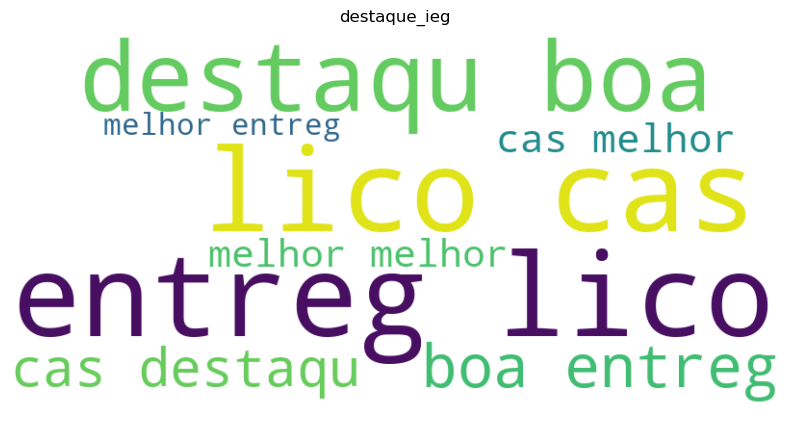

Total words: 4310
Unique words: 6
Most common words: [('entreg', 862), ('lico', 862), ('cas', 862), ('destaqu', 577), ('boa', 577), ('melhor', 570)]


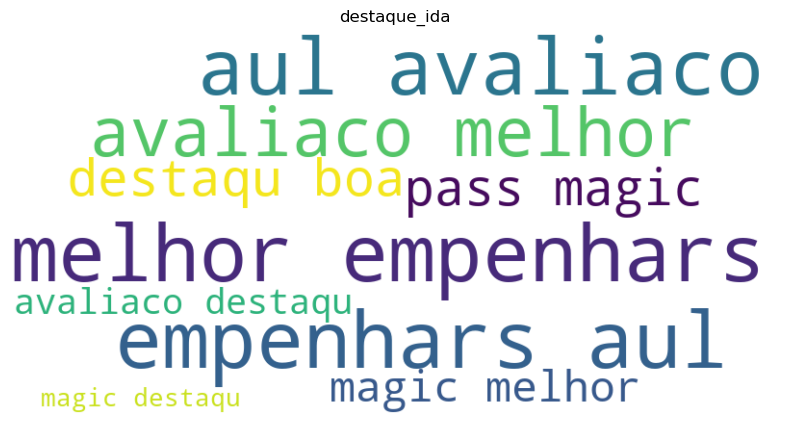

Total words: 3687
Unique words: 9
Most common words: [('melhor', 623), ('empenhars', 623), ('aul', 623), ('avaliaco', 623), ('destaqu', 239), ('boa', 239), ('not', 239), ('pass', 239), ('magic', 239)]


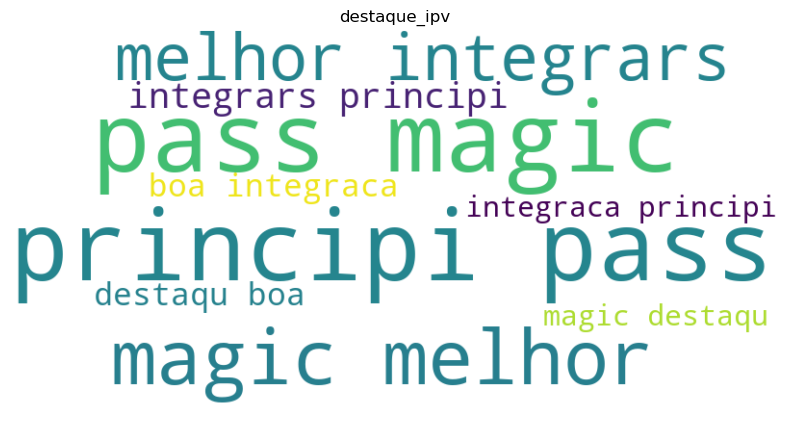

Total words: 4687
Unique words: 8
Most common words: [('principi', 862), ('pass', 862), ('magic', 862), ('melhor', 485), ('integrars', 485), ('destaqu', 377), ('boa', 377), ('integraca', 377)]


In [1261]:
for col in destaque_2020.columns:
    text = " ".join(destaque_2022[col].dropna())
    generate_wordcloud(text, col)
    generate_word_stats(text)



##### palavras mais comuns em destaque_2022

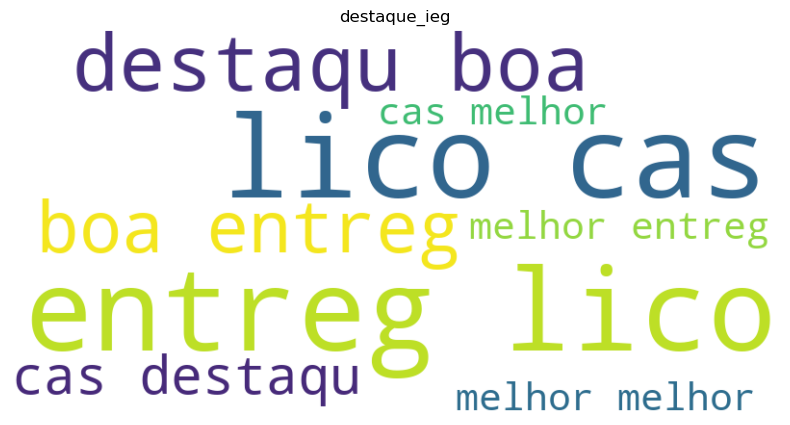

Total words: 4310
Unique words: 6
Most common words: [('entreg', 862), ('lico', 862), ('cas', 862), ('destaqu', 577), ('boa', 577), ('melhor', 570)]


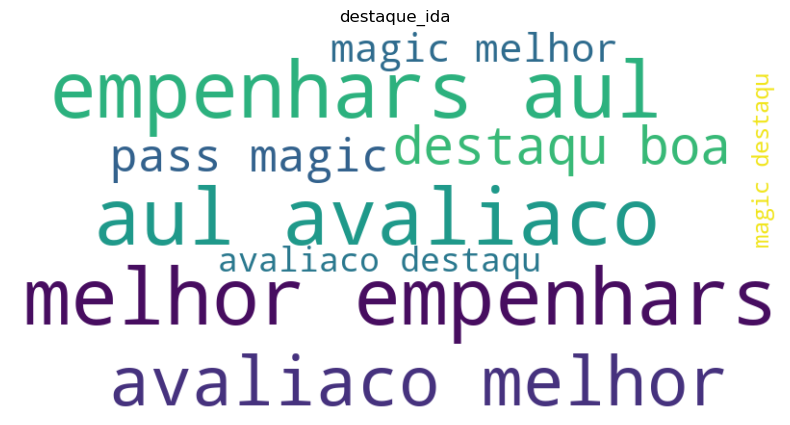

Total words: 3687
Unique words: 9
Most common words: [('melhor', 623), ('empenhars', 623), ('aul', 623), ('avaliaco', 623), ('destaqu', 239), ('boa', 239), ('not', 239), ('pass', 239), ('magic', 239)]


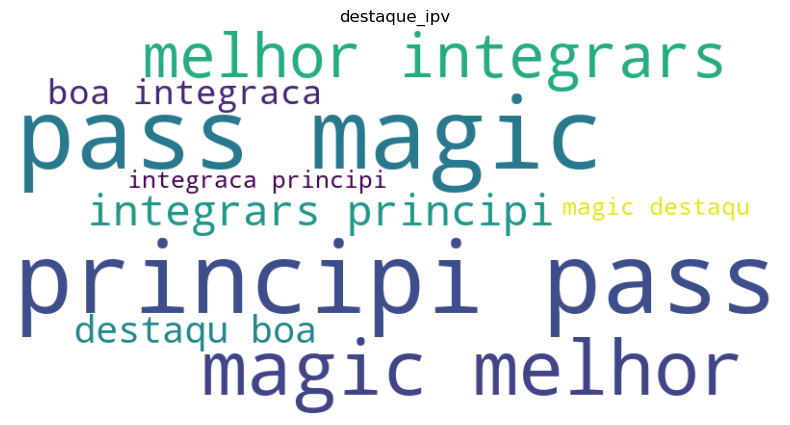

Total words: 4687
Unique words: 8
Most common words: [('principi', 862), ('pass', 862), ('magic', 862), ('melhor', 485), ('integrars', 485), ('destaqu', 377), ('boa', 377), ('integraca', 377)]


In [1262]:
for col in destaque_2022.columns:
    text = " ".join(destaque_2022[col].dropna())
    generate_wordcloud(text, col)
    generate_word_stats(text)

##### palavras mais comuns em rec_ava_2022

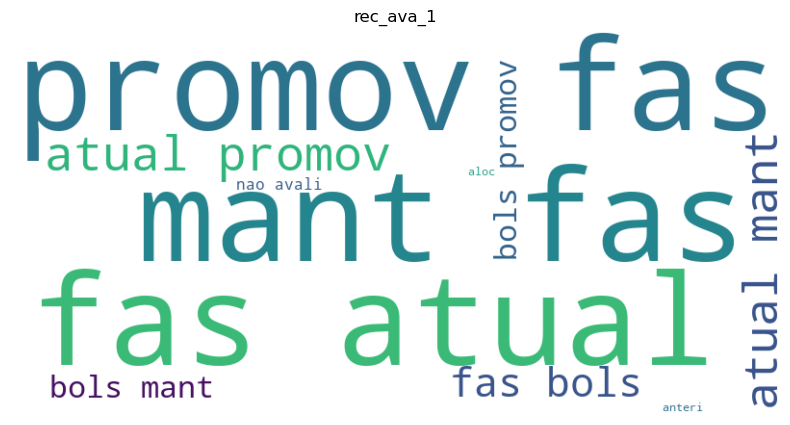

Total words: 2294
Unique words: 9
Most common words: [('fas', 860), ('promov', 430), ('mant', 429), ('atual', 422), ('bols', 147), ('nao', 2), ('avali', 2), ('aloc', 1), ('anteri', 1)]


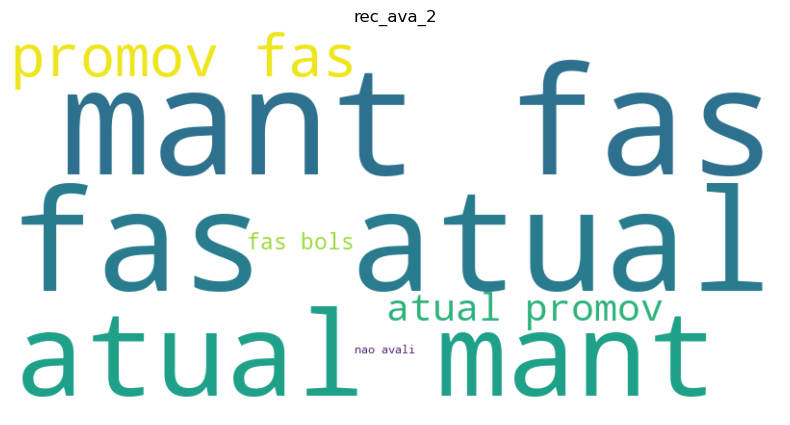

Total words: 2324
Unique words: 7
Most common words: [('fas', 860), ('mant', 574), ('atual', 571), ('promov', 286), ('bols', 29), ('nao', 2), ('avali', 2)]


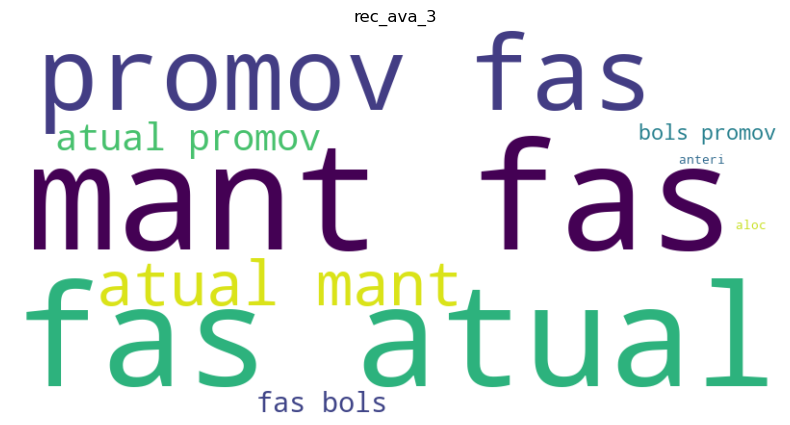

Total words: 1631
Unique words: 7
Most common words: [('fas', 626), ('mant', 322), ('atual', 304), ('promov', 298), ('bols', 69), ('aloc', 6), ('anteri', 6)]


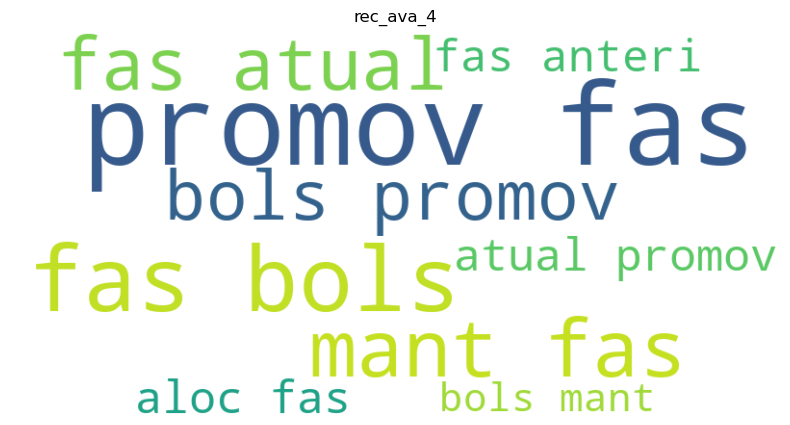

Total words: 777
Unique words: 7
Most common words: [('fas', 285), ('promov', 169), ('bols', 104), ('mant', 78), ('atual', 65), ('aloc', 38), ('anteri', 38)]


In [1263]:
for col in rec_ava_2022.columns:
    text = " ".join(rec_ava_2022[col].dropna())
    generate_wordcloud(text, col)
    generate_word_stats(text)

#### palavras mais comuns em rec_equipe_2021

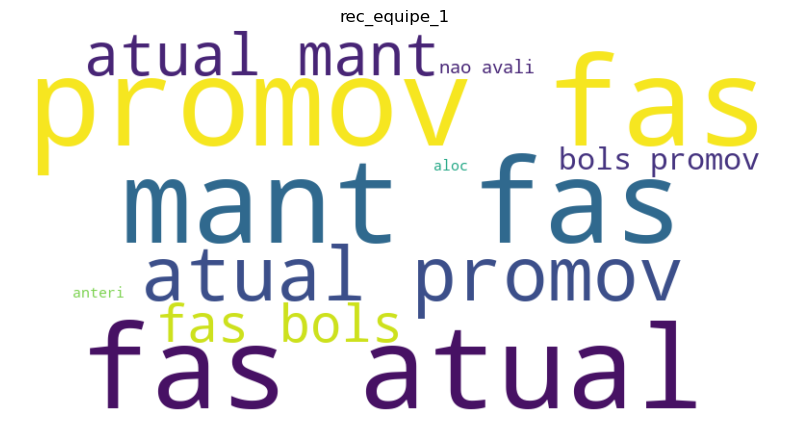

Total words: 1794
Unique words: 9
Most common words: [('fas', 673), ('promov', 351), ('mant', 314), ('atual', 309), ('bols', 105), ('nao', 13), ('avali', 13), ('aloc', 8), ('anteri', 8)]


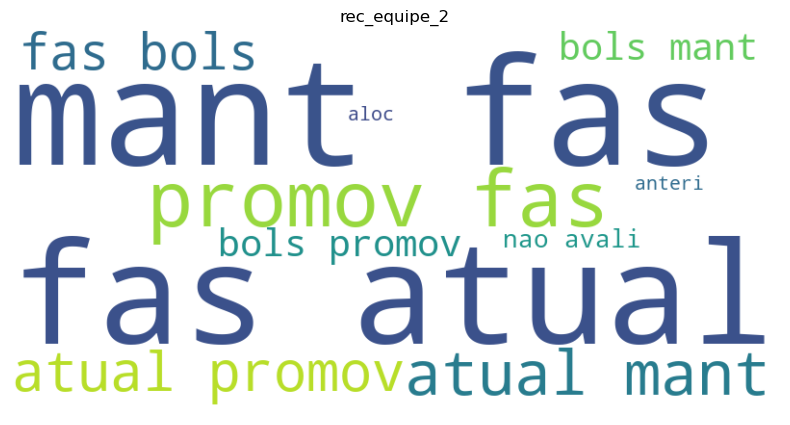

Total words: 1847
Unique words: 9
Most common words: [('fas', 668), ('mant', 364), ('atual', 348), ('promov', 295), ('bols', 118), ('nao', 18), ('avali', 18), ('aloc', 9), ('anteri', 9)]


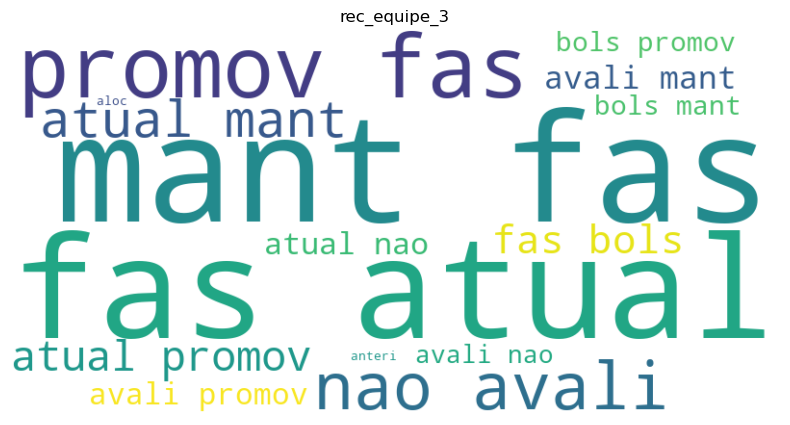

Total words: 1740
Unique words: 9
Most common words: [('fas', 543), ('mant', 279), ('atual', 275), ('promov', 263), ('nao', 143), ('avali', 143), ('bols', 92), ('aloc', 1), ('anteri', 1)]


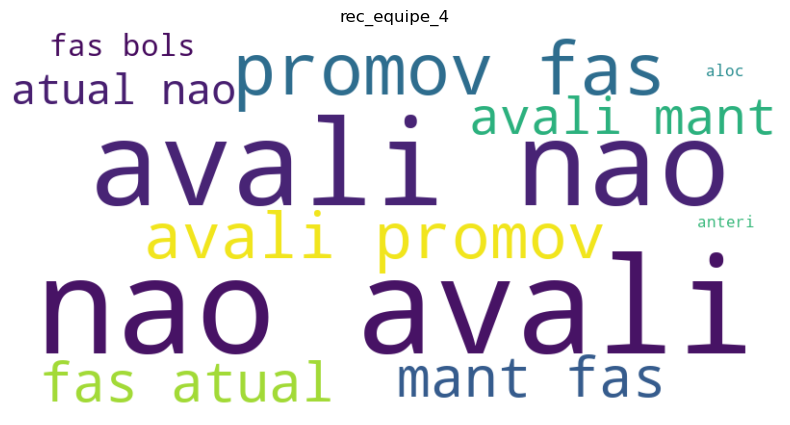

Total words: 1441
Unique words: 9
Most common words: [('nao', 542), ('avali', 542), ('fas', 144), ('promov', 91), ('mant', 52), ('atual', 51), ('bols', 17), ('aloc', 1), ('anteri', 1)]


In [1264]:
for col in rec_equipe_2021.columns:
    text = " ".join(rec_equipe_2021[col].dropna())
    generate_wordcloud(text, col)
    generate_word_stats(text)


#### rec_ava_2022 e rec_equipe_2021 

São colunas que possuem praticamente o mesmo conteúdo, então serão uniformizadas.

In [1265]:
for col in rec_ava_2022.columns:
    print(col, ":", rec_ava_2022[col].value_counts())



rec_ava_1 : rec_ava_1
mant fas atual     422
promov fas         290
promov fas bols    140
mant fas bols        7
nao avali            2
aloc fas anteri      1
Name: count, dtype: int64
rec_ava_2 : rec_ava_2
mant fas atual     571
promov fas         260
promov fas bols     26
mant fas bols        3
nao avali            2
Name: count, dtype: int64
rec_ava_3 : rec_ava_3
mant fas atual     304
promov fas         247
                   236
promov fas bols     51
mant fas bols       18
aloc fas anteri      6
Name: count, dtype: int64
rec_ava_4 : rec_ava_4
                   577
promov fas bols     91
promov fas          78
mant fas atual      65
aloc fas anteri     38
mant fas bols       13
Name: count, dtype: int64


In [1266]:
positive_words = ["promov", "bol"]
negative_words = ["aloc", "anter"]
neutral_words = ["mant", "atual"]

for col in rec_ava_2022.columns:
    rec_ava_2022[f"{col}_resultado"] = rec_ava_2022[col].apply(
        analyze_sentiment,
        positive_words=positive_words,
        negative_words=negative_words,
        neutral_words=neutral_words,
    )

rec_ava_2022

,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,rec_ava_1_resultado,rec_ava_2_resultado,rec_ava_3_resultado,rec_ava_4_resultado
nome,,,,,,,,
ALUNO-2,mant fas bols,mant fas atual,,,Positivo,Neutro,NaN,NaN
ALUNO-4,promov fas,mant fas atual,promov fas,,Positivo,Neutro,Positivo,NaN
ALUNO-5,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN
ALUNO-6,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN
ALUNO-7,promov fas,promov fas,,,Positivo,Positivo,NaN,NaN
...,...,...,...,...,...,...,...,...
ALUNO-1342,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN
ALUNO-1343,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN
ALUNO-1346,promov fas,promov fas,,,Positivo,Positivo,NaN,NaN


In [1267]:
for col in rec_equipe_2021.columns:
    print(col, ":", rec_equipe_2021[col].value_counts())


rec_equipe_1 : rec_equipe_1
mant fas atual     309
promov fas         251
promov fas bols    100
nao avali           13
aloc fas anteri      8
mant fas bols        5
Name: count, dtype: int64
rec_equipe_2 : rec_equipe_2
mant fas atual     348
promov fas         193
promov fas bols    102
nao avali           18
mant fas bols       16
aloc fas anteri      9
Name: count, dtype: int64
rec_equipe_3 : rec_equipe_3
mant fas atual     275
promov fas         175
nao avali          143
promov fas bols     88
mant fas bols        4
aloc fas anteri      1
Name: count, dtype: int64
rec_equipe_4 : rec_equipe_4
nao avali          542
promov fas          75
mant fas atual      51
promov fas bols     16
mant fas bols        1
aloc fas anteri      1
Name: count, dtype: int64


In [1268]:
for col in rec_equipe_2021.columns:
    rec_equipe_2021[f"{col}_resultado"] = rec_equipe_2021[col].apply(
        analyze_sentiment,
        positive_words=positive_words,
        negative_words=negative_words,
        neutral_words=neutral_words,
    )

rec_equipe_2021


,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,rec_equipe_1_resultado,rec_equipe_2_resultado,rec_equipe_3_resultado,rec_equipe_4_resultado
nome,,,,,,,,
ALUNO-1,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN
ALUNO-3,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN
ALUNO-5,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN
ALUNO-8,promov fas bols,promov fas,promov fas,mant fas atual,Positivo,Positivo,Positivo,Neutro
ALUNO-11,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN
...,...,...,...,...,...,...,...,...
ALUNO-1338,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN
ALUNO-1343,mant fas atual,nao avali,mant fas atual,nao avali,Neutro,NaN,Neutro,NaN
ALUNO-1344,mant fas atual,promov fas,mant fas atual,nao avali,Neutro,Positivo,Neutro,NaN


#### colunas de destaque

In [1269]:
for col in destaque_2020.columns:
    print(col, ":", destaque_2020[col].value_counts())




destaque_ieg : destaque_ieg
destaqu boa entreg lico cas           476
pont melhor melhor entreg lico cas    227
Name: count, dtype: int64
destaque_ida : destaque_ida
pont melhor empenhars aul avaliaco    404
destaqu boa not pass magic            299
Name: count, dtype: int64
destaque_ipv : destaque_ipv
pont melhor integrars principi pass magic    368
destaqu boa integraca principi pass magic    335
Name: count, dtype: int64


In [1270]:
for col in destaque_2022.columns:
    print(col, ":", destaque_2022[col].value_counts())


destaque_ieg : destaque_ieg
destaqu boa entreg lico cas      577
melhor melhor entreg lico cas    285
Name: count, dtype: int64
destaque_ida : destaque_ida
melhor empenhars aul avaliaco    623
destaqu boa not pass magic       239
Name: count, dtype: int64
destaque_ipv : destaque_ipv
melhor integrars principi pass magic         485
destaqu boa integraca principi pass magic    377
Name: count, dtype: int64


In [1271]:
positive_words = ["destaqu", "boa"]
negative_words = ["melhor", "empenh"]

for col in destaque_2020.columns:
    destaque_2020[f"{col}_resultado"] = destaque_2020[col].apply(
        analyze_sentiment, positive_words=positive_words, negative_words=negative_words
    )
destaque_2020.head()

,destaque_ieg,destaque_ida,destaque_ipv,destaque_ieg_resultado,destaque_ida_resultado,destaque_ipv_resultado
nome,,,,,,
ALUNO-1,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo
ALUNO-3,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo
ALUNO-4,pont melhor melhor entreg lico cas,pont melhor empenhars aul avaliaco,pont melhor integrars principi pass magic,Negativo,Negativo,Negativo
ALUNO-5,destaqu boa entreg lico cas,destaqu boa not pass magic,destaqu boa integraca principi pass magic,Positivo,Positivo,Positivo
ALUNO-8,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo


In [1272]:
for col in destaque_2022.columns:
    destaque_2022[f"{col}_resultado"] = destaque_2022[col].apply(
        analyze_sentiment, positive_words=positive_words, negative_words=negative_words
    )
destaque_2022.head()

,destaque_ieg,destaque_ida,destaque_ipv,destaque_ieg_resultado,destaque_ida_resultado,destaque_ipv_resultado
nome,,,,,,
ALUNO-2,destaqu boa entreg lico cas,destaqu boa not pass magic,destaqu boa integraca principi pass magic,Positivo,Positivo,Positivo
ALUNO-4,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo
ALUNO-5,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo
ALUNO-6,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo
ALUNO-7,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo


### Encoding das colunas com avaliação de sentimento

In [1273]:
# ordinal encoding das colunas com avaliação de sentimento destaque, rec_ava e rec_equipe
# - Negativo = -1
# - Neutro = 0
# - Positivo = 1
cols_destaque_resultado = destaque_2020.columns[destaque_2020.columns.str.contains('resultado')].tolist()
cols_rec_ava_resultado = rec_ava_2022.columns[rec_ava_2022.columns.str.contains('resultado')].tolist()
cols_rec_equipe_resultado = rec_equipe_2021.columns[rec_equipe_2021.columns.str.contains('resultado')].tolist()

def encode_sentiment(text):
    if text == "Negativo":
        return -1
    elif text == "Neutro":
        return 0
    elif text == "Positivo":
        return 1
    else:
        return np.nan   

for col in cols_destaque_resultado:
    destaque_2020[f"{col}_encoded"] = destaque_2020[col].apply(encode_sentiment)

for col in cols_destaque_resultado:
    destaque_2022[f"{col}_encoded"] = destaque_2022[col].apply(encode_sentiment)

for col in cols_rec_ava_resultado:
    rec_ava_2022[f"{col}_encoded"] = rec_ava_2022[col].apply(encode_sentiment)

for col in cols_rec_equipe_resultado:
    rec_equipe_2021[f"{col}_encoded"] = rec_equipe_2021[col].apply(encode_sentiment)

In [1274]:
destaque_2020.head()

,destaque_ieg,destaque_ida,destaque_ipv,destaque_ieg_resultado,destaque_ida_resultado,destaque_ipv_resultado,destaque_ieg_resultado_encoded,destaque_ida_resultado_encoded,destaque_ipv_resultado_encoded
nome,,,,,,,,,
ALUNO-1,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1
ALUNO-3,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1
ALUNO-4,pont melhor melhor entreg lico cas,pont melhor empenhars aul avaliaco,pont melhor integrars principi pass magic,Negativo,Negativo,Negativo,-1,-1,-1
ALUNO-5,destaqu boa entreg lico cas,destaqu boa not pass magic,destaqu boa integraca principi pass magic,Positivo,Positivo,Positivo,1,1,1
ALUNO-8,destaqu boa entreg lico cas,pont melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1


In [1275]:
destaque_2022.head()

,destaque_ieg,destaque_ida,destaque_ipv,destaque_ieg_resultado,destaque_ida_resultado,destaque_ipv_resultado,destaque_ieg_resultado_encoded,destaque_ida_resultado_encoded,destaque_ipv_resultado_encoded
nome,,,,,,,,,
ALUNO-2,destaqu boa entreg lico cas,destaqu boa not pass magic,destaqu boa integraca principi pass magic,Positivo,Positivo,Positivo,1,1,1
ALUNO-4,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1
ALUNO-5,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1
ALUNO-6,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1
ALUNO-7,destaqu boa entreg lico cas,melhor empenhars aul avaliaco,destaqu boa integraca principi pass magic,Positivo,Negativo,Positivo,1,-1,1


In [1276]:
rec_ava_2022.head()

,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,rec_ava_1_resultado,rec_ava_2_resultado,rec_ava_3_resultado,rec_ava_4_resultado,rec_ava_1_resultado_encoded,rec_ava_2_resultado_encoded,rec_ava_3_resultado_encoded,rec_ava_4_resultado_encoded
nome,,,,,,,,,,,,
ALUNO-2,mant fas bols,mant fas atual,,,Positivo,Neutro,NaN,NaN,1.0,0.0,NaN,NaN
ALUNO-4,promov fas,mant fas atual,promov fas,,Positivo,Neutro,Positivo,NaN,1.0,0.0,1.0,NaN
ALUNO-5,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN
ALUNO-6,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN
ALUNO-7,promov fas,promov fas,,,Positivo,Positivo,NaN,NaN,1.0,1.0,NaN,NaN


In [1277]:
rec_equipe_2021.head()

,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,rec_equipe_1_resultado,rec_equipe_2_resultado,rec_equipe_3_resultado,rec_equipe_4_resultado,rec_equipe_1_resultado_encoded,rec_equipe_2_resultado_encoded,rec_equipe_3_resultado_encoded,rec_equipe_4_resultado_encoded
nome,,,,,,,,,,,,
ALUNO-1,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN,1.0,1.0,0.0,NaN
ALUNO-3,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN,1.0,1.0,0.0,NaN
ALUNO-5,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN,1.0,0.0,0.0,NaN
ALUNO-8,promov fas bols,promov fas,promov fas,mant fas atual,Positivo,Positivo,Positivo,Neutro,1.0,1.0,1.0,0.0
ALUNO-11,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN,1.0,0.0,0.0,NaN


#### síntese dos indicadores de rec_ava e rec_equipe

In [1278]:
import math

In [1279]:
rec_ava_2022.head()

,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,rec_ava_1_resultado,rec_ava_2_resultado,rec_ava_3_resultado,rec_ava_4_resultado,rec_ava_1_resultado_encoded,rec_ava_2_resultado_encoded,rec_ava_3_resultado_encoded,rec_ava_4_resultado_encoded
nome,,,,,,,,,,,,
ALUNO-2,mant fas bols,mant fas atual,,,Positivo,Neutro,NaN,NaN,1.0,0.0,NaN,NaN
ALUNO-4,promov fas,mant fas atual,promov fas,,Positivo,Neutro,Positivo,NaN,1.0,0.0,1.0,NaN
ALUNO-5,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN
ALUNO-6,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN
ALUNO-7,promov fas,promov fas,,,Positivo,Positivo,NaN,NaN,1.0,1.0,NaN,NaN


In [1280]:
cols_res_enc = rec_ava_2022.columns[rec_ava_2022.columns.str.contains('resultado_encoded')]
value_counts_dict = rec_ava_2022[cols_res_enc].iloc[3].value_counts().to_dict()
# Filter out NaN or null-like values
filtered_dict = {k: v for k, v in value_counts_dict.items() if pd.notnull(k)}

# Find the key with the maximum frequency
most_frequent_value = max(filtered_dict, key=filtered_dict.get)

print(most_frequent_value)

0.0


In [1281]:
def get_most_frequent_value(df):
    value_counts_dict = df.value_counts().to_dict()
    # Filter out NaN or null-like values
    filtered_dict = {k: v for k, v in value_counts_dict.items() if pd.notnull(k)}

    # Find the key with the maximum frequency
    try:
        most_frequent_value = max(filtered_dict, key=filtered_dict.get)
    except:
        most_frequent_value = np.nan
    
    return most_frequent_value

rec_ava_sintese = []
for i in range(rec_ava_2022.shape[0]):
    rec_ava_sintese.append(get_most_frequent_value(rec_ava_2022[cols_res_enc].iloc[i]))



In [1282]:
rec_ava_2022['rec_sintese'] = rec_ava_sintese
rec_ava_2022.head()

,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,rec_ava_1_resultado,rec_ava_2_resultado,rec_ava_3_resultado,rec_ava_4_resultado,rec_ava_1_resultado_encoded,rec_ava_2_resultado_encoded,rec_ava_3_resultado_encoded,rec_ava_4_resultado_encoded,rec_sintese
nome,,,,,,,,,,,,,
ALUNO-2,mant fas bols,mant fas atual,,,Positivo,Neutro,NaN,NaN,1.0,0.0,NaN,NaN,1.0
ALUNO-4,promov fas,mant fas atual,promov fas,,Positivo,Neutro,Positivo,NaN,1.0,0.0,1.0,NaN,1.0
ALUNO-5,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN,0.0
ALUNO-6,mant fas atual,promov fas,mant fas atual,,Neutro,Positivo,Neutro,NaN,0.0,1.0,0.0,NaN,0.0
ALUNO-7,promov fas,promov fas,,,Positivo,Positivo,NaN,NaN,1.0,1.0,NaN,NaN,1.0


In [1283]:
cols_res_enc = rec_equipe_2021.columns[rec_equipe_2021.columns.str.contains('resultado_encoded')]
rec_equipe_sintese = []
for i in range(rec_equipe_2021.shape[0]):
    rec_equipe_sintese.append(get_most_frequent_value(rec_equipe_2021[cols_res_enc].iloc[i]))

rec_equipe_2021['rec_sintese'] = rec_equipe_sintese
rec_equipe_2021.head()

,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,rec_equipe_1_resultado,rec_equipe_2_resultado,rec_equipe_3_resultado,rec_equipe_4_resultado,rec_equipe_1_resultado_encoded,rec_equipe_2_resultado_encoded,rec_equipe_3_resultado_encoded,rec_equipe_4_resultado_encoded,rec_sintese
nome,,,,,,,,,,,,,
ALUNO-1,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN,1.0,1.0,0.0,NaN,1.0
ALUNO-3,promov fas,promov fas,mant fas atual,nao avali,Positivo,Positivo,Neutro,NaN,1.0,1.0,0.0,NaN,1.0
ALUNO-5,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN,1.0,0.0,0.0,NaN,0.0
ALUNO-8,promov fas bols,promov fas,promov fas,mant fas atual,Positivo,Positivo,Positivo,Neutro,1.0,1.0,1.0,0.0,1.0
ALUNO-11,promov fas,mant fas atual,mant fas atual,nao avali,Positivo,Neutro,Neutro,NaN,1.0,0.0,0.0,NaN,0.0


### Dataset por ano após pré-processamento

In [1284]:
df_2020_preproc = df_2020.join(destaque_2020.drop(columns=['destaque_ida', 'destaque_ipv', 'destaque_ieg'])).copy()
df_2022_preproc = df_2022.join(destaque_2022.drop(columns=['destaque_ida', 'destaque_ipv', 'destaque_ieg'])).copy()

In [1285]:
df_2021_preproc = df_2021.join(rec_equipe_2021.drop(columns=['rec_equipe_1',	'rec_equipe_2',	'rec_equipe_3',	'rec_equipe_4'])).copy()
df_2022_preproc = df_2022.join(rec_ava_2022.drop(columns=['rec_ava_1',	'rec_ava_2',	'rec_ava_3',	'rec_ava_4'])).copy()

In [1286]:
df_2020_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, ALUNO-1 to ALUNO-1348
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   instituicao_ensino_aluno        703 non-null    object
 1   idade_aluno                     703 non-null    object
 2   anos_pm                         703 non-null    object
 3   fase_turma                      703 non-null    object
 4   ponto_virada                    701 non-null    object
 5   inde                            703 non-null    object
 6   inde_conceito                   703 non-null    object
 7   pedra                           703 non-null    object
 8   destaque_ieg                    703 non-null    object
 9   destaque_ida                    703 non-null    object
 10  destaque_ipv                    703 non-null    object
 11  iaa                             703 non-null    object
 12  ieg                             703 non-nu

In [1287]:
df_2021_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, ALUNO-1 to ALUNO-1348
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fase                            686 non-null    int64  
 1   turma                           686 non-null    object 
 2   instituicao_ensino_aluno        686 non-null    object 
 3   sinalizador_ingressante         686 non-null    object 
 4   pedra                           686 non-null    object 
 5   inde                            686 non-null    object 
 6   iaa                             686 non-null    float64
 7   ieg                             686 non-null    float64
 8   ips                             686 non-null    float64
 9   ida                             686 non-null    float64
 10  ipp                             686 non-null    float64
 11  rec_equipe_1                    686 non-null    object 
 12  rec_equipe_2                

In [1288]:
df_2022_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, ALUNO-2 to ALUNO-1349
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fase                         862 non-null    int64  
 1   turma                        862 non-null    object 
 2   ano_ingresso                 862 non-null    float64
 3   bolsista                     862 non-null    object 
 4   inde                         862 non-null    float64
 5   cg                           862 non-null    float64
 6   cf                           862 non-null    float64
 7   ct                           862 non-null    float64
 8   pedra                        862 non-null    object 
 9   destaque_ieg                 862 non-null    object 
 10  destaque_ida                 862 non-null    object 
 11  destaque_ipv                 862 non-null    object 
 12  iaa                          862 non-null    float64
 13  ieg         

In [1289]:
# Escreve em arquivo
df_2020_preproc.to_csv("data/df_2020_preproc.csv")
df_2021_preproc.to_csv("data/df_2021_preproc.csv")
df_2022_preproc.to_csv("data/df_2022_preproc.csv")